# " Las mipymes: una solución a medias "

In [92]:
import biblioteca_funciones as bf

datos_precios_tiendas, datos_tasas_cambio_usd_mlc, precios_max_min, precios_canasta, precios_arroz, datos_extras = bf.cargar_datos_desde_json(path_precios_tiendas = "C:\\Ciencia de Datos\\1er Semestre\\INTRODUCCION A LA CIENCIA DE DATOS\\icd\\THE ULTIMATE PROJECT\\MIPYMES\\mipymes_tusd_tmlc.json", path_tasas_cambio_usd_mlc = "C:\\Ciencia de Datos\\1er Semestre\\INTRODUCCION A LA CIENCIA DE DATOS\\icd\\THE ULTIMATE PROJECT\\MIPYMES\\toque.json", path_precios_max_min = "C:\\Ciencia de Datos\\1er Semestre\\INTRODUCCION A LA CIENCIA DE DATOS\\icd\\THE ULTIMATE PROJECT\\MIPYMES\\precios_max_min.json", path_precios_canasta = "C:\\Ciencia de Datos\\1er Semestre\\INTRODUCCION A LA CIENCIA DE DATOS\\icd\\THE ULTIMATE PROJECT\\MIPYMES\\precios_canasta.json", path_precios_arroz = "C:\\Ciencia de Datos\\1er Semestre\\INTRODUCCION A LA CIENCIA DE DATOS\\icd\\THE ULTIMATE PROJECT\\MIPYMES\\json\\seguimiento_arroz.json", path_datos_extras = "C:\\Ciencia de Datos\\1er Semestre\\INTRODUCCION A LA CIENCIA DE DATOS\\icd\\THE ULTIMATE PROJECT\\MIPYMES\\datos_extras.json")

prom_usd, prom_mlc = bf.calcular_tasa_promedio(datos_tasas_cambio_usd_mlc)

mip, usd, mlc = bf.convertir_precios_cup_usd_mlc(datos_precios_tiendas, prom_usd, prom_mlc)

m, u, ml = bf.trabajo_datos_tiendas(mip, usd, mlc)

analisis = bf.trabajo_estadistico(m, u, ml)

precios = bf.suma_productos_cb(analisis)

precios_ind = bf.obtener_precios_individuales_cb(analisis)

comparacion = bf.comparar_precios(precios_max_min, analisis)

redes_y_arroz = bf.analizar_precios_mip_por_redes_sociales(datos_precios_tiendas)

La Revolución Cubana triunfó y con ella también el socialismo. Durante sus primeros años el florecimiento económico fue notable, pero al estar en gran parte influenciado por los lazos de amistad con la otrora Unión Soviética, cuando esta desapareció, nuestro pueblo se vio sumido en una enorme crisis en todas las esferas. Entonces comenzó el tan conocido y temido Período Especial: una etapa que aún no alcanza su fecha de caducidad.

En la actualidad, el Estado cubano continúa buscando soluciones, pues entre las presiones del gobierno norteamericano por derrocarnos y la gigantesca deuda externa, para el cubano de a pie es cada vez más complicado apenas llegar a fin de mes. Sin dudas, una de las propuestas con mayor aceptación entre aquellos, ya sea, ansiosos o necesitados de emprender, han sido las mipymes. 

Con el objetivo de estudiar el comportamiento de los precios en estos comercios, visitamos 30 de ellos en un municipio estratégico: Plaza de la Revolución, por presentar la población más envejecida de la capital. Veamos al cierre del año 2024 la estructura de la población por grupos etarios:


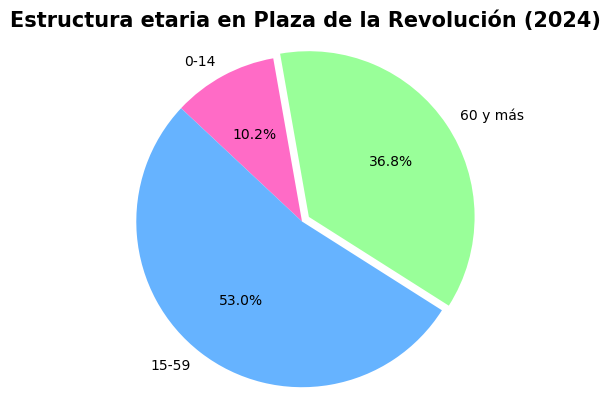

In [93]:
import matplotlib.pyplot as plt
datos_plaza = datos_extras["datos_especificos_plaza_revolucion"]["estructura_etaria_2024"]
etiquetas = []
cantidades = []
for grupo in datos_plaza:
    etiquetas.append(grupo["rango"])      
    cantidades.append(grupo["poblacion"])
colores = ["#ff6bc6", '#66b3ff', '#99ff99']
plt.pie(cantidades, 
        labels=etiquetas, 
        autopct='%1.1f%%', 
        startangle=100, 
        colors=colores,
        explode=(0, 0, 0.05))
plt.title("Estructura etaria en Plaza de la Revolución (2024)", fontsize=15, fontweight='bold')
plt.axis('equal') # asegura que el pie sea redondo
plt.show()

A pesar de que la jubilación fue aumentada, esta nunca cubre las necesidades. Imaginemos entonces un lugar donde estas personas, a menos que cuenten con ingresos extras, no tengan prácticamente ni lo mínimo para sobrevivir. En especial cuando han sido ellos los que han permitido cada conquista de nuestra Revolución: aquellos ‘maestros’ que propiciaron que Cuba se declarara territorio libre de analfabetismo o los médicos que han puesto sangre, sudor y lágrimas para salvar vidas, tanto en su nación, como en cualquier recóndito rincón de nuestro planeta que necesitara ayuda. 

Aunque contamos con una canasta básica familiar, siendo fundamental el término básica, puesto cada año son menos los productos recibidos. Esto causa que el cubano tenga que acudir a los comercios locales, ya sean las mipymes o a los cuentapropistas. 

A pesar de que las primeras son el centro de nuestra investigación, también tuvimos en cuenta los precios de tiendas estatales: cuatro en dólares y una en moneda libremente convertible, las cuales escasean en la actualidad. Incluso, la de MLC que se analiza en este estudio, ya pasó a área dólar. Y es que aunque tuvimos en cuenta más de diez productos, de estos solo encontramos unos pocos en el tercer tipo de comercio. Esto ocurre prácticamente en todas las que están en esta moneda.


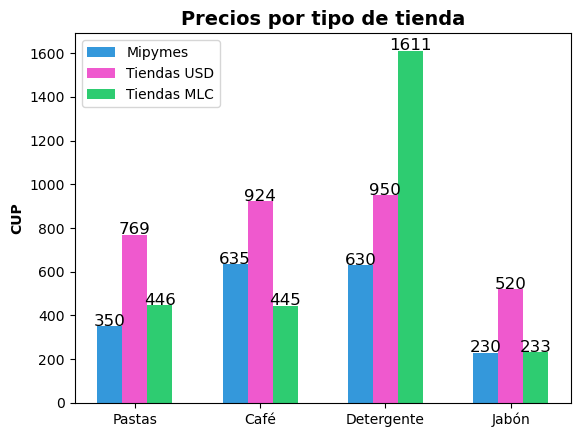

In [94]:
productos_comunes = ["Pastas", "Café", "Detergente", "Jabón"]
precios_mipyme = []
precios_usd = []
precios_mlc = []
for prod in productos_comunes:
    precios_mipyme.append(analisis["mipymes"][prod]["moda"])
    precios_usd.append(analisis["tiendas_usd"][prod]["moda"])
    precios_mlc.append(analisis["tiendas_mlc"][prod]["moda"])
indices = []
pos_mipyme = []
pos_usd = []
pos_mlc = []
for i in range(len(productos_comunes)):
    indices.append(i)
    pos_mipyme.append(i - 0.2) # 1ra barra
    pos_usd.append(i)          # 2da barra
    pos_mlc.append(i + 0.2)    # 3ra barra
plt.bar(pos_mipyme, precios_mipyme, width=0.2, label='Mipymes', color='#3498db') # width: ancho de las barras
plt.bar(pos_usd, precios_usd, width=0.2, label='Tiendas USD', color="#ef59ce")
plt.bar(pos_mlc, precios_mlc, width=0.2, label='Tiendas MLC', color='#2ecc71')
for i in range(len(indices)):
    plt.text(pos_mipyme[i], precios_mipyme[i] + 2, f'{precios_mipyme[i]:.0f}', ha='center', fontsize=12)
    plt.text(pos_usd[i], precios_usd[i] + 2, f'{precios_usd[i]:.0f}', ha='center', fontsize=12)
    plt.text(pos_mlc[i], precios_mlc[i] + 2, f'{precios_mlc[i]:.0f}', ha='center', fontsize=12)
plt.title('Precios por tipo de tienda', fontsize=14, fontweight='bold')
plt.ylabel('CUP', fontweight='bold')
plt.xticks(indices, productos_comunes)
plt.legend()
plt.show()

El hecho de que gran parte de la población reciba su salario en moneda nacional es un grave problema. Sí, podríamos pensar en las CADECAS, pero los animo a pasarse por una, y si logran que les vendan dólares, será de puro milagro. Por tanto, es necesario acudir al cambio informal para poder contar con una moneda que no se devalúe abismalmente cada minuto que pasa. Aunque el Estado ha intentado tomar cartas en el asunto, el Toque se ha posicionado entre los cubanos por proporcionar un precio de venta mucho más ventajoso para aquellos que posean divisas.

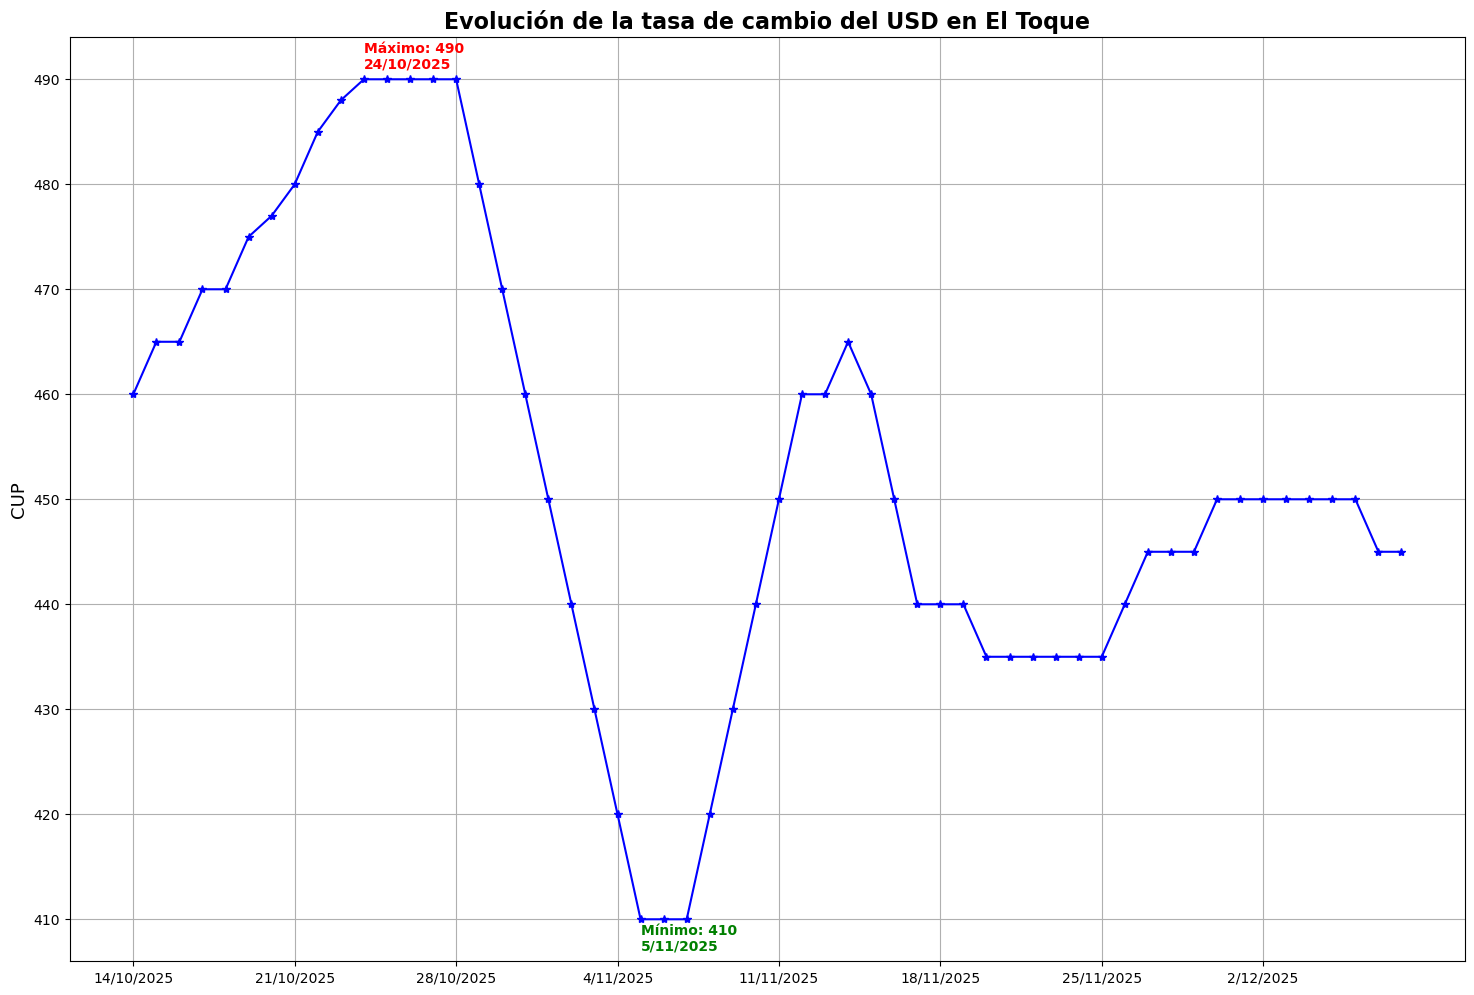

In [95]:
datos_usd = datos_tasas_cambio_usd_mlc["El toque"][0]["Cambio informal del USD en CUP"]
fechas = []
precios = []
for dia in datos_usd:
    fechas.append(dia["fecha"])
    precios.append(dia["precio"])
valor_max = max(precios)
valor_min = min(precios)
pos_max = precios.index(valor_max)
pos_min = precios.index(valor_min)
plt.figure(figsize=(18, 12))
plt.plot(fechas, precios, marker='*', color='blue')
plt.text(fechas[pos_max], valor_max + 1, f"Máximo: {valor_max}\n{fechas[pos_max]}", color='red', fontweight='bold')
plt.text(fechas[pos_min], valor_min - 3, f"Mínimo: {valor_min}\n{fechas[pos_min]}", color='green', fontweight='bold')
plt.title("Evolución de la tasa de cambio del USD en El Toque", fontsize=16, fontweight="bold")
plt.ylabel("CUP", fontsize = 13)
plt.xticks(fechas[::7]) # era mejor mostrar una fecha por semana para que no se amontonasen
plt.grid(True)
plt.show()

Volviendo al tema de las mipymes, para poder hacer el análisis tomamos productos claves, como aquellos que se comercializan en las bodegas (arroz, frijoles, leche, pollo, aceite, azúcar, café, sal, compota, detergente, jabón y pasta dental), así como algunos otros también estratégicos (pastas alimenticias, avena, huevos, gelatina, jugo, maicena y culeros), ya sea por su popularidad entre los cubanos, sus beneficios para la salud o para de cierto modo cubrir algunas necesidades del adulto mayor, como lo es la dieta blanda. Específicamente tuvimos en cuenta ciertas medidas, escogiendo para los productos normados aquellas presentaciones en las que se venden:

    1 lb para los granos, el pollo, el aceite y el azúcar
    1 kg para la leche en polvo, la avena, la sal, la maicena y el detergente
    500 g para las pastas
    4 oz para el café molido
    30 unidades para los huevos y los culeros de adultos
    100 g para la gelatina
    1 L para el jugo
    200 mL para la compota
    115 g para el jabón
    85 mL para la pasta dental

Siendo notable que a pesar de que la gran parte de la población es de la tercera edad y estas personas son más propensas a sufrir de incontinencia urinaria, solo pudimos encontrar culeros para adultos en uno de los establecimientos. E incluso, el arroz, el cual es un alimento prácticamente indispensable para los cubanos, en la mayoría de los lugares estaba agotado.

In [96]:
from IPython.display import Video, display

display(Video(
    r"C:\Ciencia de Datos\1er Semestre\INTRODUCCION A LA CIENCIA DE DATOS\icd\Facebook 596277406619262(480P_SD).mp4",
    embed=True
))

En la actualidad, al pasar tanto tiempo en redes sociales, numerosos comercios apuestan por crear cuentas en estas para dar promoción a sus productos y el costo del arroz resulta un indicador de cómo funciona realmente el mercado.

In [102]:
print(redes_y_arroz)

Aquellas mipymes con redes sociales tienen precios más altos. El costo promedio del arroz en aquellas con redes es 850.36 CUP y en las que no tienen : 678.12 CUP.


Obviamente el precio de aquellos productos normados en las bodegas es mucho menor que aquel por el cual se venden en los demás establecimientos, por lo que ni siquiera sería notable hacer una representación gráfica de esta diferencia. Sin embargo, analizar los precios de esos mismos productos en las mipymes y las tiendas en USD (el valor en dólares fue convertido a CUP), sí lo es. Resulta impresionante que el cubano encuentre mejores ofertas en los establecimientos no estatales.

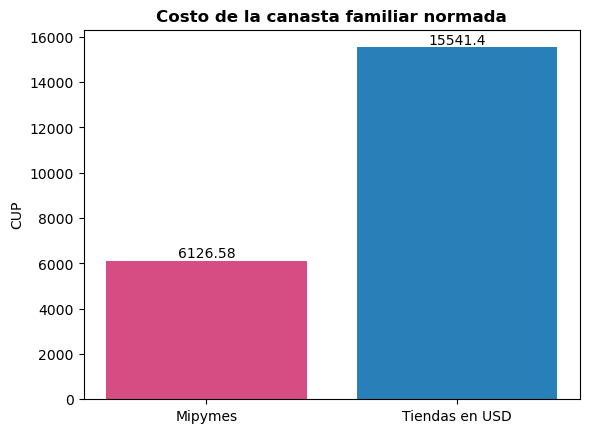

In [112]:
tiendas = ("Mipymes", "Tiendas en USD")
costos = list(precios.values())
colores = ["#d54d83", '#2980b9']
barras = plt.bar(tiendas, costos, color=colores)
plt.title('Costo de la canasta familiar normada', fontsize=12, fontweight='bold')
plt.ylabel('CUP')
plt.bar_label(barras)
plt.show()

Y es que, aunque los precios luzcan más atractivos, la realidad es que en la mayoría ni siquiera cumplen con los topes establecidos por el Estado.

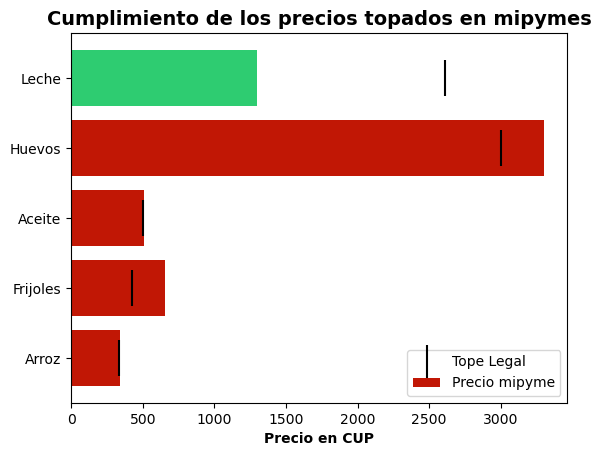

In [125]:
productos = []
precios_mipyme = []
topes_legales = []
colores = []
for prod, inf in comparacion.items():
    # Necesito extraer el precio como tal
    texto = list(inf)[0]
    # Separo primero por los paréntesis y luego por el " vs "
    num = texto.split('(')[1].split(')')[0]
    p_mipyme, p_tope = num.split(' vs ')
    p_mip = float(p_mipyme)
    p_top = float(p_tope)
    productos.append(prod)
    precios_mipyme.append(p_mip)
    topes_legales.append(p_top)
    # Verde si cumple el tope y Rojo si no
    if p_mip <= p_top:
        colores.append('#2ecc71'  )
    else:
        colores.append("#c11705")
plt.barh(productos, precios_mipyme, color=colores, label='Precio mipyme')
plt.scatter(topes_legales, productos, color='black', marker='|', s=700, label='Tope Legal')
plt.title('Cumplimiento de los precios topados en mipymes', fontsize=14, fontweight='bold')
plt.xlabel('Precio en CUP', fontweight='bold')
plt.legend()
plt.show()

Ante este panorama sale a la luz un grave problema económico: la corrupción, pues los encargados de controlar que se cumpla la ley no parecen realizar muy bien su trabajo. A esto hay que añadir que a estas personas se les paga un salario que probablemente sea mejor que lo que cobra el sector más vulnerable, lo cual viene a ser un gasto completamente en vano.

Tal como habíamos mencionado, el hecho de que la jubilación sea tan baja es muy preocupante. A tal punto que el adulto mayor que recibe la mínima, necesitaría obtener al menos el doble de lo actual para apenas acceder a un mínimo de los productos necesarios

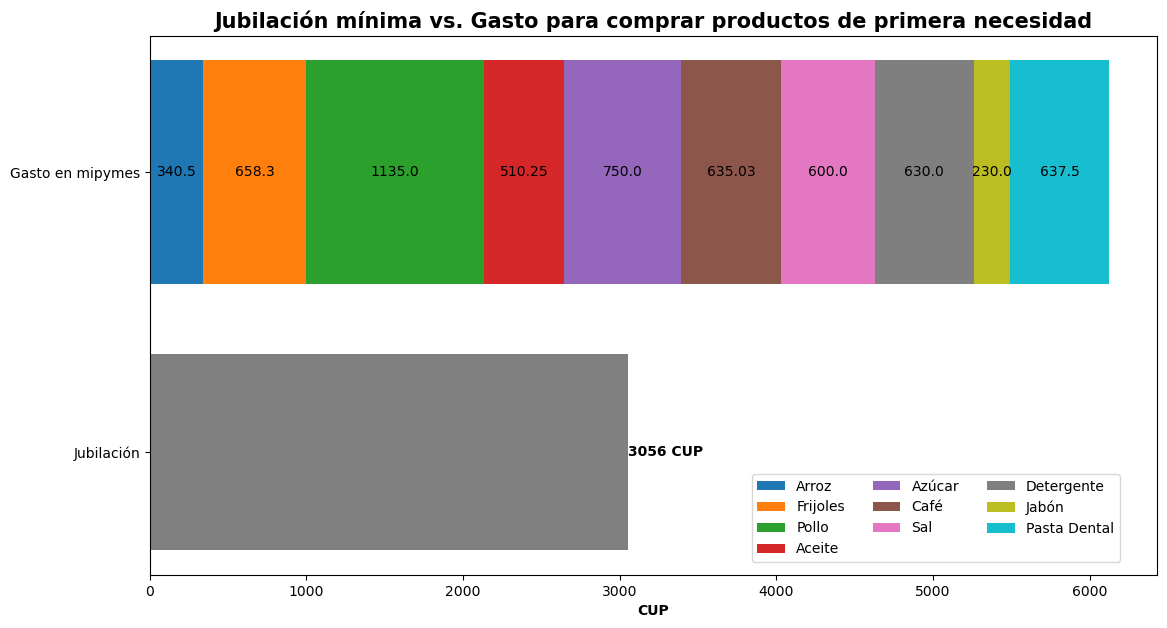

In [218]:
jubilacion = datos_extras["pensiones_para_sectores_vulnerables"]["jubilacion_minima"]
productos = list(precios_ind.keys())
valores = list(precios_ind.values())
plt.figure(figsize=(13, 7))
plt.barh("Jubilación", jubilacion, color='gray', height=0.7)
plt.text(jubilacion, 0, f"{jubilacion} CUP", va='center', fontweight='bold')
inicio = 0
for i in range(len(productos)):
    plt.barh("Gasto en mipymes", valores[i], left=inicio, label=productos[i])
    plt.text(inicio + valores[i]/2, 1, f"{valores[i]}", ha='center', va='center', color='black', fontsize=10) # inicio + valores[i]/2 permite que los precios de las mipymes estén en cada porción del rectángulo y ha y va permiten que el texto esté centrado
    inicio += valores[i]
plt.title("Jubilación mínima vs. Gasto para comprar productos de primera necesidad", fontsize=15, fontweight='bold')
plt.xlabel("CUP", fontweight='bold')
plt.legend(loc='upper center', bbox_to_anchor=(0.78, 0.2), ncol=3)
plt.show()

Y si a esto sumamos todos aquellos productos que tuvimos en cuenta por ser beneficiosos para ellos, así como muchos otros, como son los medicamentos, la situación es cada vez más desesperanzadora.

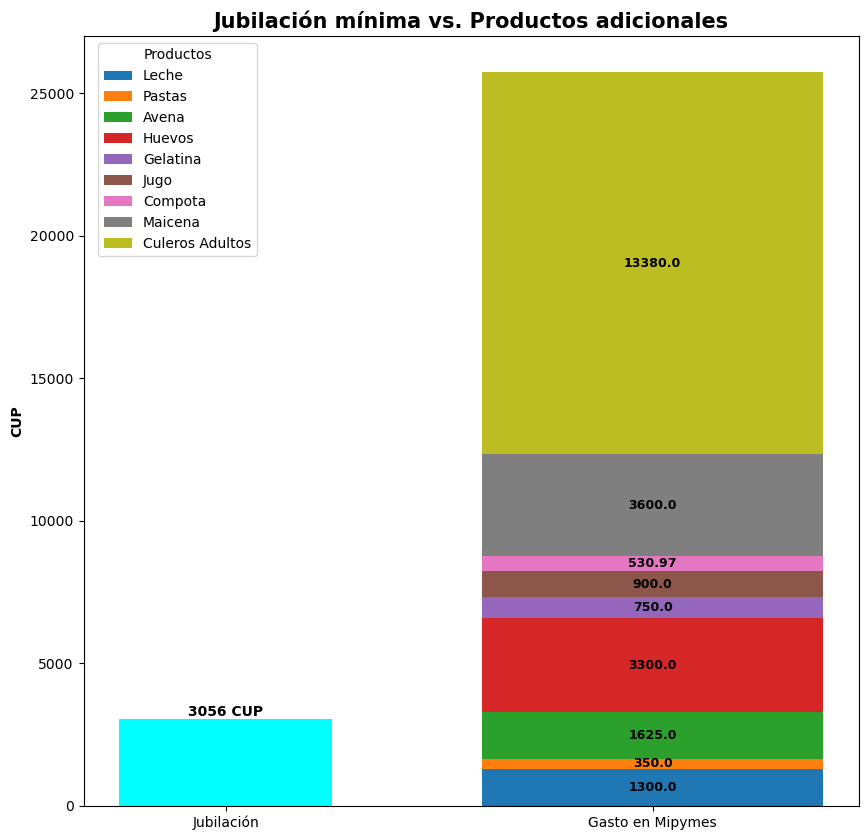

In [223]:
datos_mipymes = analisis['mipymes']
otros_productos = precios_ind.keys()
jubilacion = datos_extras["pensiones_para_sectores_vulnerables"]["jubilacion_minima"]
nombres_filtrados = []
valores_filtrados = []
for producto, estadisticas in datos_mipymes.items():
    if producto not in otros_productos and producto != "Culeros Niños":
        nombres_filtrados.append(producto)
        valores_filtrados.append(estadisticas['moda'])
plt.figure(figsize=(10, 10))
plt.bar("Jubilación", jubilacion, color='cyan', width=0.5)
plt.text(0, jubilacion, f"{jubilacion} CUP", ha='center', va='bottom', fontweight='bold')
acumulado = 0
for i in range(len(nombres_filtrados)):
    valor = valores_filtrados[i]
    nombre = nombres_filtrados[i]
    plt.bar("Gasto en Mipymes", valor, bottom=acumulado, label=nombre)
    plt.text(1, acumulado + valor/2, f"{valor}", ha='center', va='center', color='black', fontsize=9, fontweight='bold')
    acumulado += valor
plt.title("Jubilación mínima vs. Productos adicionales", fontsize=15, fontweight='bold')
plt.ylabel("CUP", fontsize=10, fontweight='bold')
plt.legend(loc='upper left', bbox_to_anchor=(0.01, 1), title="Productos") #bbox_to_anchor controla la posición exacta de la leyenda
plt.show()

Incluso peor es el caso de aquellos que son pensionados o asistenciados, quienes cuentan con menos que los jubilados, lo cual es mucho decir.

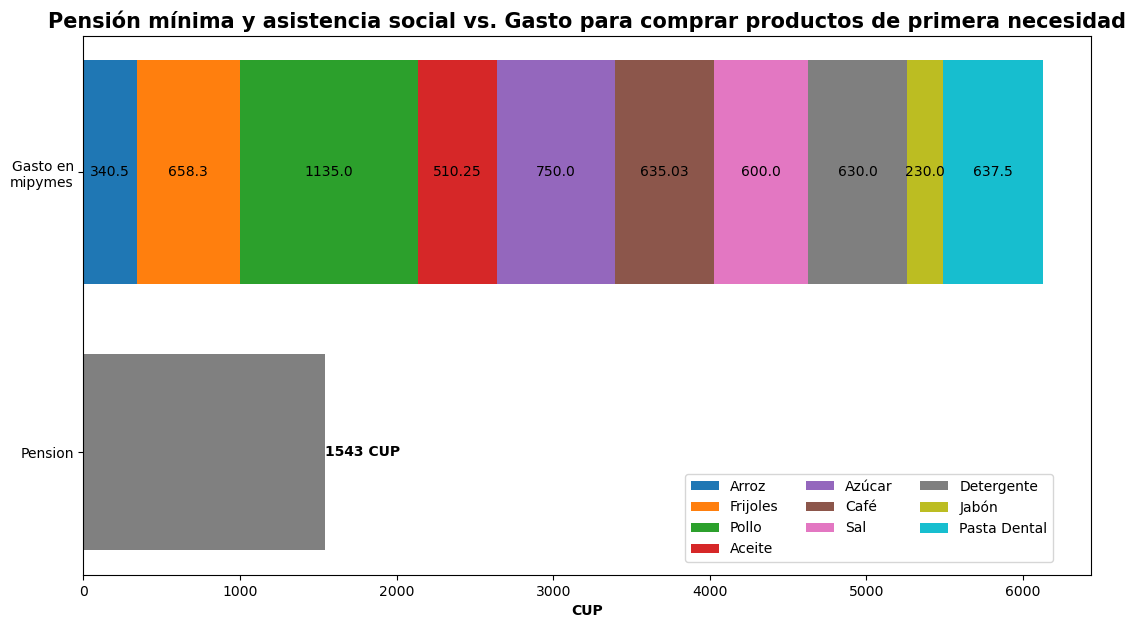

In [224]:
pension = datos_extras["pensiones_para_sectores_vulnerables"]["pension_minima"]
productos = list(precios_ind.keys())
valores = list(precios_ind.values())
plt.figure(figsize=(13, 7))
plt.barh("Pension", pension, color='gray', height=0.7)
plt.text(pension, 0, f"{pension} CUP", va='center', fontweight='bold')
inicio = 0
for i in range(len(productos)):
    plt.barh("Gasto en\nmipymes", valores[i], left=inicio, label=productos[i])
    plt.text(inicio + valores[i]/2, 1, f"{valores[i]}", ha='center', va='center', color='black', fontsize=10)
    inicio += valores[i]
plt.title("Pensión mínima y asistencia social vs. Gasto para comprar productos de primera necesidad", fontsize=15, fontweight='bold')
plt.xlabel("CUP", fontweight='bold')
plt.legend(loc='upper center', bbox_to_anchor=(0.78, 0.2), ncol=3)
plt.show()

Y esto no hace más que reflejar la suma pobreza en la que se encuentra el pueblo cubano, en especial nuestros ancianos y demás personas vulnerables. E incluso cuando la dirección de nuestro país continúa realizando esfuerzos para avanzar hacia el mejoramiento de la calidad de vida, mientras no exista un cambio radical en las diferentes estructuras a todos los niveles, en lugar de transformaciones sin sentido, no lograremos avanzar como sociedad.